In [19]:
# Import os
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [20]:
# Define the file path
superstore = Path('superstore_data.csv')

In [21]:
# Read csv file
superstore_df = pd.read_csv(superstore, encoding='ISO-8859-1')  
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [22]:
# Count the rows
superstore_df.count()

Row ID           9994
Order ID         9994
Order Date       9994
Ship Date        9994
Ship Mode        9994
Customer ID      9994
Customer Name    9994
Segment          9994
Country          9994
City             9994
State            9994
Postal Code      9994
Region           9994
Product ID       9994
Category         9994
Sub-Category     9994
Product Name     9994
Sales            9994
Quantity         9994
Discount         9994
Profit           9994
dtype: int64

In [23]:
# Retrieve the data info
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [24]:
# View all the columns
print(superstore_df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [25]:
# Convert the order date and ship date columns to datetime

from datetime import datetime as dt

# Convert to datetime
superstore_df['Order Date'] = pd.to_datetime(superstore_df['Order Date'])
superstore_df['Ship Date'] = pd.to_datetime(superstore_df['Ship Date'])

superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
# View data type
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Bar Plot Showing Profitability By State

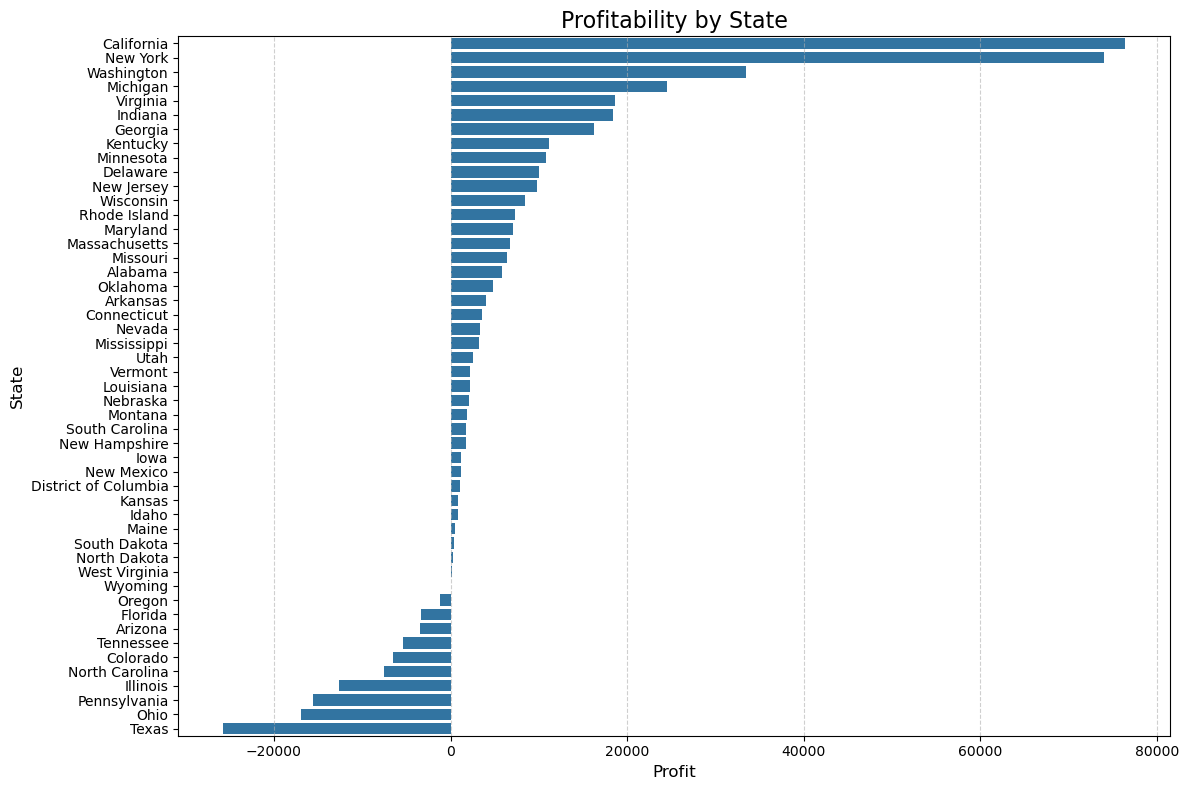

In [9]:
# Aggregate profitability by state
state_profit = superstore_df.groupby('State')['Profit'].sum().reset_index()

# Sort by profit for better visualization
state_profit_sorted = state_profit.sort_values(by='Profit', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Profit', 
    y='State', 
    data=state_profit_sorted, 
    order=state_profit_sorted['State']
)
plt.title('Profitability by State', fontsize=16)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Bar Chart Showing Most Popular Category By State

                    State         Category       Sales
2                 Alabama       Technology    8969.080
3                 Arizona        Furniture   13525.291
7                Arkansas  Office Supplies    4565.330
11             California       Technology  159271.082
12               Colorado        Furniture   13243.037
16            Connecticut  Office Supplies    5418.340
20               Delaware       Technology   14562.220
23   District of Columbia       Technology    1379.920
26                Florida       Technology   46968.036
28                Georgia  Office Supplies   26715.810
30                  Idaho        Furniture    2595.482
35               Illinois       Technology   31983.673
38                Indiana       Technology   26323.250
39                   Iowa        Furniture    2642.310
43                 Kansas  Office Supplies    1954.150
47               Kentucky       Technology   12570.640
49              Louisiana  Office Supplies    3423.160
53        

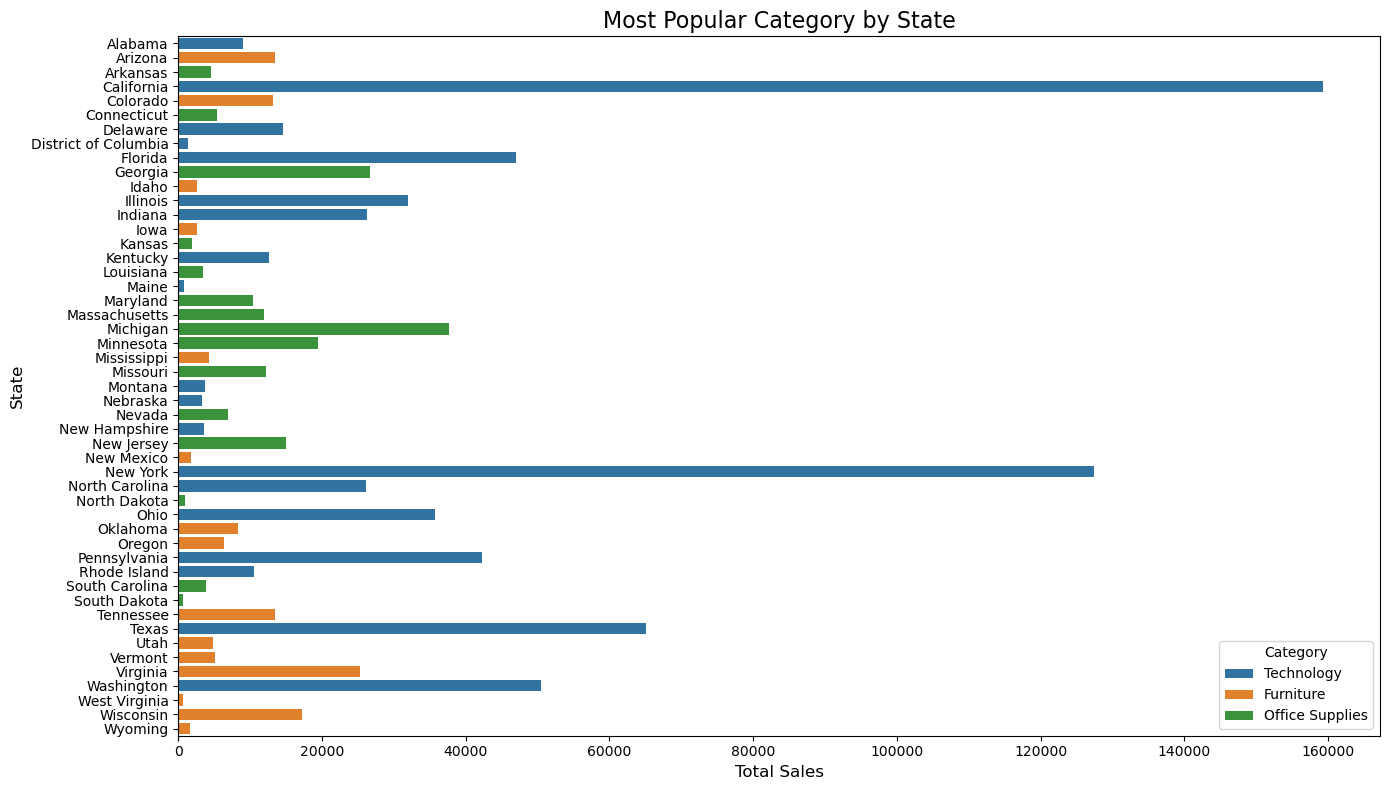

In [10]:
# Identify the most popular category in each state based on sales
state_category_sales = superstore_df.groupby(['State', 'Category'])['Sales'].sum().reset_index()

# Determine the most popular category for each state
most_popular_category = state_category_sales.loc[
    state_category_sales.groupby('State')['Sales'].idxmax()
]

# Plot a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Sales', 
    y='State', 
    hue='Category', 
    data=most_popular_category, 
    dodge=False  
)
plt.title('Most Popular Category by State', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.legend(title='Category')
plt.tight_layout()

# Display the results
print(most_popular_category)

plt.show()

## Interactive Map Showing Sales And Profit For Each State

In [11]:
import folium
from folium.plugins import MarkerCluster

# Full list of state coordinates
state_coordinates = {
    "Alabama": [32.806671, -86.791130],
    "Alaska": [61.370716, -152.404419],
    "Arizona": [33.729759, -111.431221],
    "Arkansas": [34.969704, -92.373123],
    "California": [36.116203, -119.681564],
    "Colorado": [39.059811, -105.311104],
    "Connecticut": [41.597782, -72.755371],
    "Delaware": [39.318523, -75.507141],
    "Florida": [27.766279, -81.686783],
    "Georgia": [33.040619, -83.643074],
    "Hawaii": [21.094318, -157.498337],
    "Idaho": [44.240459, -114.478828],
    "Illinois": [40.349457, -88.986137],
    "Indiana": [39.849426, -86.258278],
    "Iowa": [42.011539, -93.210526],
    "Kansas": [38.526600, -96.726486],
    "Kentucky": [37.668140, -84.670067],
    "Louisiana": [31.169546, -91.867805],
    "Maine": [44.693947, -69.381927],
    "Maryland": [39.063946, -76.802101],
    "Massachusetts": [42.230171, -71.530106],
    "Michigan": [43.326618, -84.536095],
    "Minnesota": [45.694454, -93.900192],
    "Mississippi": [32.741646, -89.678696],
    "Missouri": [38.456085, -92.288368],
    "Montana": [46.921925, -110.454353],
    "Nebraska": [41.125370, -98.268082],
    "Nevada": [38.313515, -117.055374],
    "New Hampshire": [43.452492, -71.563896],
    "New Jersey": [40.298904, -74.521011],
    "New Mexico": [34.840515, -106.248482],
    "New York": [42.165726, -74.948051],
    "North Carolina": [35.630066, -79.806419],
    "North Dakota": [47.528912, -99.784012],
    "Ohio": [40.388783, -82.764915],
    "Oklahoma": [35.565342, -96.928917],
    "Oregon": [44.572021, -122.070938],
    "Pennsylvania": [40.590752, -77.209755],
    "Rhode Island": [41.680893, -71.511780],
    "South Carolina": [33.856892, -80.945007],
    "South Dakota": [44.299782, -99.438828],
    "Tennessee": [35.747845, -86.692345],
    "Texas": [31.054487, -97.563461],
    "Utah": [40.150032, -111.862434],
    "Vermont": [44.045876, -72.710686],
    "Virginia": [37.769337, -78.169968],
    "Washington": [47.400902, -121.490494],
    "West Virginia": [38.491226, -80.954456],
    "Wisconsin": [44.268543, -89.616508],
    "Wyoming": [42.755966, -107.302490]
}

# Aggregate data by state and region 
state_geo_data = superstore_df.groupby(['State', 'Region'])[['Profit', 'Sales']].sum().reset_index()

# Create a base map centered on the US
us_superstore_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for each state with sales and profit information
marker_cluster = MarkerCluster().add_to(us_superstore_map)

for _, row in state_geo_data.iterrows():
    state_name = row['State']
    if state_name in state_coordinates: 
        folium.Marker(
            location=state_coordinates[state_name],
            popup=(
                f"State: {row['State']}<br>"
                f"Region: {row['Region']}<br>"
                f"Total Profit: ${row['Profit']:.2f}<br>"
                f"Total Sales: ${row['Sales']:.2f}"
            ),
        ).add_to(marker_cluster)

# Save the map as an HTML file
us_superstore_map.save("/Users/wisdomchimezie/Desktop/project-three/interactive_superstore_map_with_coordinates.html")

print("Map saved to interactive_superstore_map_with_coordinates.html")

Map saved to interactive_superstore_map_with_coordinates.html


##  Correlation Between Sales, Profit And Discount

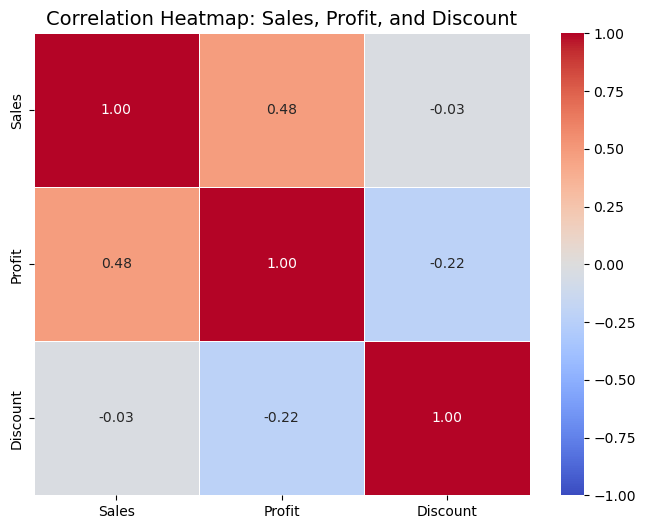

In [12]:

# Preparing data for the heatmap (correlation between sales, profit, and discount)
correlation_data = superstore_df[['Sales', 'Profit', 'Discount']].corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_data,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Correlation Heatmap: Sales, Profit, and Discount', fontsize=14)
plt.show()

## Comparison Of Total Profit Across Regions

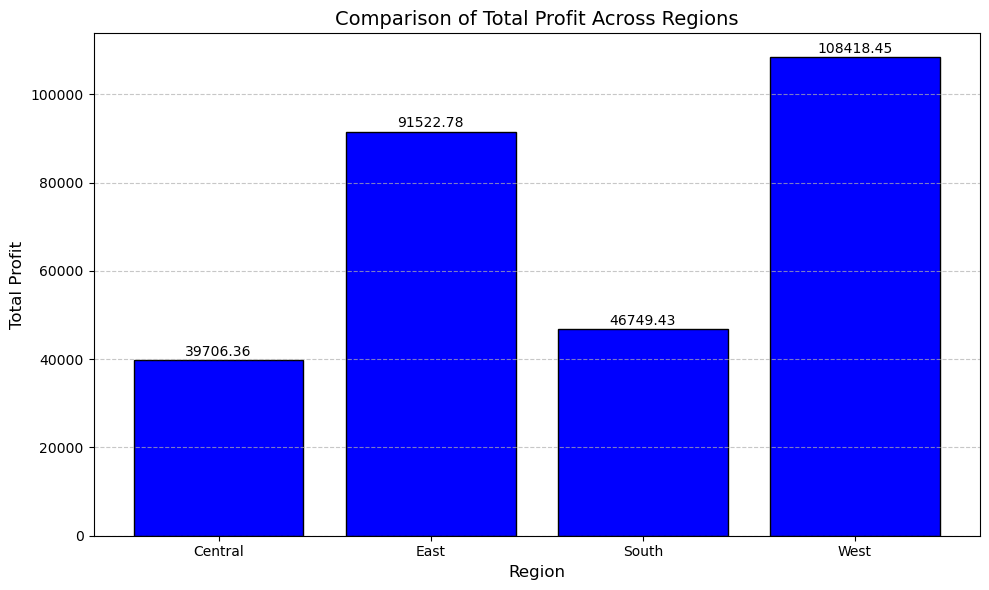

In [13]:
region_analysis = superstore_df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Discount=('Discount', 'mean')
).reset_index()

# Calculate total profit per region
total_profit_by_region = region_analysis[['Region', 'Total_Profit']]

# Bar chart to compare total profit across regions
plt.figure(figsize=(10, 6))

# Plotting total profit by region
plt.bar(total_profit_by_region['Region'], total_profit_by_region['Total_Profit'], color='blue', edgecolor='black')

# Adding labels and title
plt.title('Comparison of Total Profit Across Regions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bars with profit values
for index, value in enumerate(total_profit_by_region['Total_Profit']):
    plt.text(index, value + 1000, f'{value:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Analysis Of Shipment Rate By Quarter

In [14]:
# Adding a column for the quarter
superstore_df['Quarter'] = superstore_df['Order Date'].dt.quarter

# Aggregating data to calculate the shipment rate by quarter
quarter_shipments = superstore_df.groupby('Quarter').size().reset_index(name='Shipment_Count')

# Determining the quarter with the highest rate of shipments
max_shipment_quarter = quarter_shipments.loc[quarter_shipments['Shipment_Count'].idxmax()]

# Aggregating data to find the city/state with the highest total profit
city_state_profit = superstore_df.groupby(['City', 'State']).agg(
    Total_Profit=('Profit', 'sum')
).reset_index()

highest_profit_city_state = city_state_profit.loc[city_state_profit['Total_Profit'].idxmax()]

# Filtering the data to get the items in the city/state with the highest profit
items_highest_profit = superstore_df[
    (superstore_df['City'] == highest_profit_city_state['City']) &
    (superstore_df['State'] == highest_profit_city_state['State'])
][['Product Name', 'Profit']]

top_10_items_highest_profit = items_highest_profit.sort_values(by='Profit', ascending=False).head(10)

# Displaying the results
print("Quarterly Shipment Rates:")
print(quarter_shipments)

print("\nQuarter with the Highest Shipment Rate:")
print(max_shipment_quarter)

print("\nCity/State with the Highest Profit:")
print(highest_profit_city_state)

print("\nItems Contributing to the Highest Profit in the Most Profitable City/State:")
top_10_items_highest_profit

Quarterly Shipment Rates:
   Quarter  Shipment_Count
0        1            1377
1        2            2120
2        3            2799
3        4            3698

Quarter with the Highest Shipment Rate:
Quarter              4
Shipment_Count    3698
Name: 3, dtype: int64

City/State with the Highest Profit:
City            New York City
State                New York
Total_Profit       62036.9837
Name: 380, dtype: object

Items Contributing to the Highest Profit in the Most Profitable City/State:


,Product Name,Profit
2623,Canon imageCLASS 2200 Advanced Copier,3919.9888
6626,HP Designjet T520 Inkjet Large Format Printer ...,2239.9872
8204,Zebra ZM400 Thermal Label Printer,2229.0240
318,Canon imageCLASS MF7460 Monochrome Digital Las...,1995.9900
7914,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,1668.2050
9270,GBC DocuBind TL300 Electric Binding System,1453.1238
353,GBC DocuBind P400 Electric Binding System,1415.4296
5126,Ativa V4110MDD Micro-Cut Shredder,1371.9804
6340,"3D Systems Cube Printer, 2nd Generation, Magenta",1351.9896
2182,Bady BDG101FRU Card Printer,1159.9855


In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data preparation for the dashboard
# Shipment rate by quarter (bar chart)
quarter_shipments_sorted = quarter_shipments.sort_values(by='Shipment_Count', ascending=False)

# Profit by city/state (horizontal bar chart)
city_state_profit_sorted = city_state_profit.sort_values(by='Total_Profit', ascending=False).head(10)

# Items contributing to the highest profit in the most profitable city/state (horizontal bar chart)
top_items_sorted = top_10_items_highest_profit.sort_values(by='Profit', ascending=True)

# Create the dashboard with subplots
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=(
        "Shipment Rate by Quarter",
        "Top 10 Profitable Cities/States",
        "Top 10 Profitable Items in the Most Profitable City/State"
    ),
    vertical_spacing=0.15
)

# Shipment rate by quarter
fig.add_trace(
    go.Bar(
        x=quarter_shipments_sorted['Quarter'],
        y=quarter_shipments_sorted['Shipment_Count'],
        marker_color='skyblue',
        name="Shipments by Quarter"
    ),
    row=1, col=1
)

# Profit by city/state
fig.add_trace(
    go.Bar(
        x=city_state_profit_sorted['Total_Profit'],
        y=city_state_profit_sorted['City'] + ", " + city_state_profit_sorted['State'],
        orientation='h',
        marker_color='lightgreen',
        name="Profit by City/State"
    ),
    row=2, col=1
)

# Top 10 profitable items in the most profitable city/state
fig.add_trace(
    go.Bar(
        x=top_items_sorted['Profit'],
        y=top_items_sorted['Product Name'],
        orientation='h',
        marker_color='salmon',
        name="Top Items by Profit"
    ),
    row=3, col=1
)

# Update layout
fig.update_layout(
    title="Interactive Dashboard: Shipment Rate and Profit Insights",
    height=900,
    showlegend=False,
    template="plotly_white"
)

# Show the interactive dashboard
fig.show()

## Analysis Showing The Contribution Of Customer Segment To Regional Sales And Profit

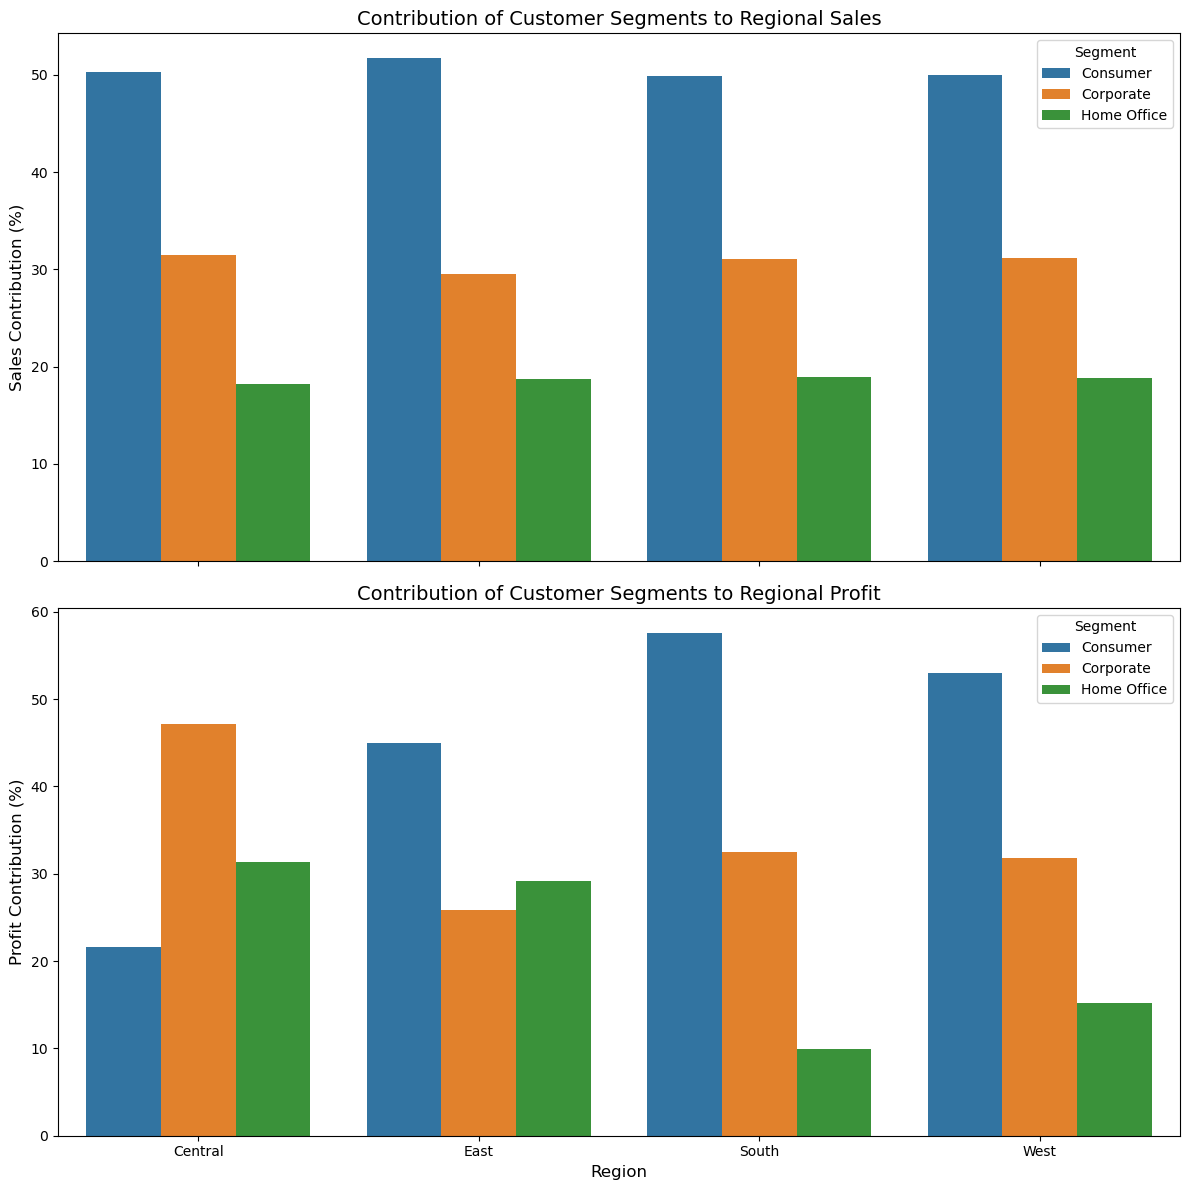

In [16]:
# Aggregating data to calculate the contribution of customer segments to regional sales and profit
segment_region_analysis = superstore_df.groupby(['Region', 'Segment']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Adding a percentage contribution column for both sales and profit
total_sales_by_region = segment_region_analysis.groupby('Region')['Total_Sales'].transform('sum')
total_profit_by_region = segment_region_analysis.groupby('Region')['Total_Profit'].transform('sum')

segment_region_analysis['Sales_Contribution (%)'] = (segment_region_analysis['Total_Sales'] / total_sales_by_region) * 100
segment_region_analysis['Profit_Contribution (%)'] = (segment_region_analysis['Total_Profit'] / total_profit_by_region) * 100

fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Sales Contribution
sns.barplot(
    data=segment_region_analysis, 
    x='Region', 
    y='Sales_Contribution (%)', 
    hue='Segment', 
    ax=axes[0]
)
axes[0].set_title('Contribution of Customer Segments to Regional Sales', fontsize=14)
axes[0].set_ylabel('Sales Contribution (%)', fontsize=12)
axes[0].legend(title='Segment')

# Profit Contribution
sns.barplot(
    data=segment_region_analysis, 
    x='Region', 
    y='Profit_Contribution (%)', 
    hue='Segment', 
    ax=axes[1]
)
axes[1].set_title('Contribution of Customer Segments to Regional Profit', fontsize=14)
axes[1].set_xlabel('Region', fontsize=12)
axes[1].set_ylabel('Profit Contribution (%)', fontsize=12)
axes[1].legend(title='Segment')

plt.tight_layout()
plt.show()

## Heatmap Showing The Contribution Of Customer Segments To Regional Sales And Profit

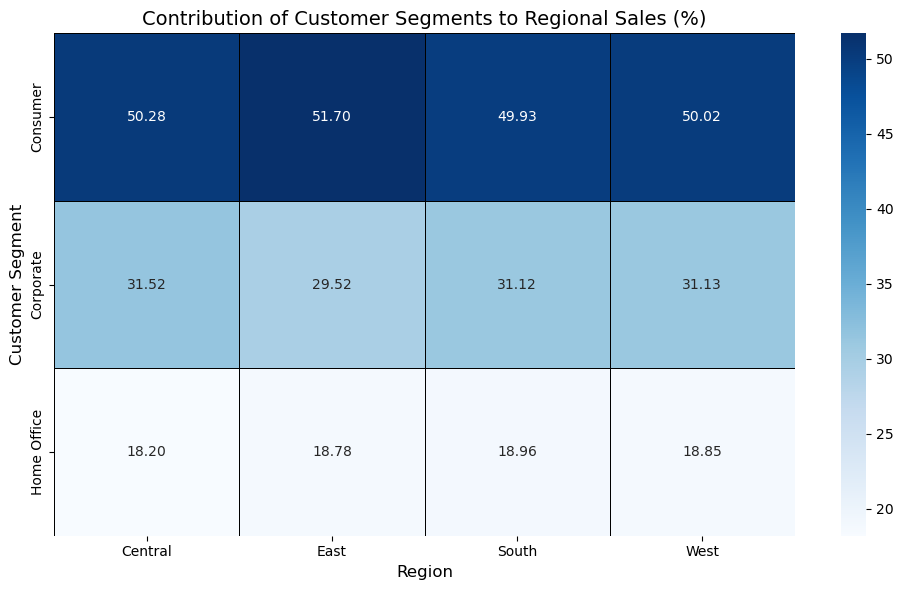

In [17]:
# Preparing data for the heatmap (sales contribution)
heatmap_sales_data = segment_region_analysis.pivot(
    index='Segment', columns='Region', values='Sales_Contribution (%)'
)

# Creating the heatmap for sales contribution
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_sales_data,
    annot=True,
    fmt=".2f",
    cmap='Blues',
    linewidths=0.5,
    linecolor='black'
)
plt.title('Contribution of Customer Segments to Regional Sales (%)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Customer Segment', fontsize=12)
plt.tight_layout()
plt.show()

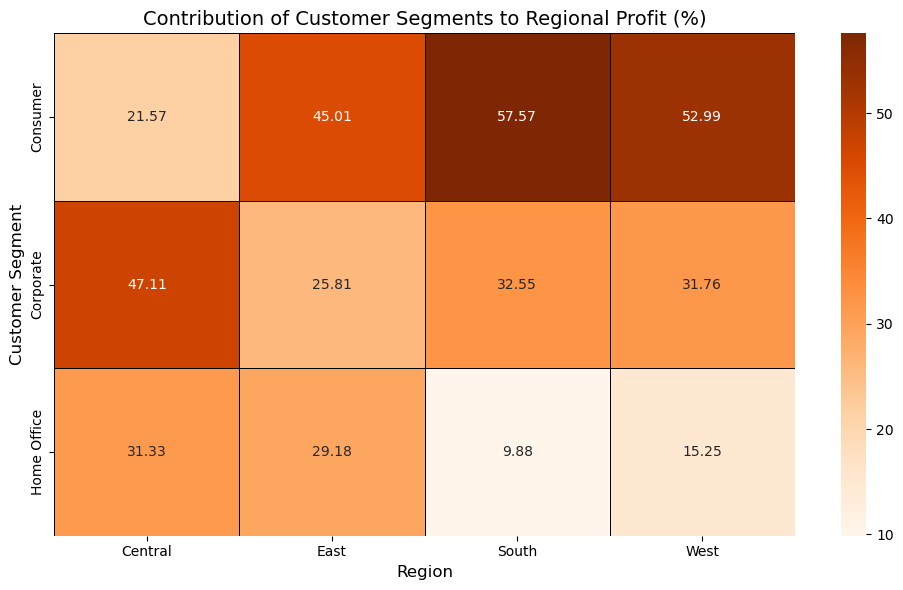

In [18]:
# Preparing data for the heatmap (profit contribution)
heatmap_profit_data = segment_region_analysis.pivot(
    index='Segment', columns='Region', values='Profit_Contribution (%)'
)

# Creating the heatmap for profit contribution
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_profit_data,
    annot=True,
    fmt=".2f",
    cmap='Oranges',
    linewidths=0.5,
    linecolor='black'
)
plt.title('Contribution of Customer Segments to Regional Profit (%)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Customer Segment', fontsize=12)
plt.tight_layout()
plt.show()